# SLU9 - Regression: Learning notebook

In this notebook we will cover the following:
* [What is regression?](#What-is-regression?)
* [Simple Linear Regression]()
* [Gradient Descent]()
* [Multiple Linear Regression]()
* [Using Scikit Learn to perform regression]()

## What is regression? 

A modeling task which objective is to create a (linear or non-linear) map between the **independent variables** (i.e. the columns in your pandas dataframe) and a set of **continuous dependent variables** (i.e. the variable you want to predict) by estimating a set of **parameters**. 

Examples of regression tasks:
* predicting house prices (example range: [100k\$; 500k\$]);
* predicting the rating that a user would assign to a movie (example range: [1 start; 7 stars]); 
* predicting the total sales for each day, in each shop of a shopping mall;
* predicting emotional descriptors for a song;
* predicting the trajectory of a fighter jet.

Let's align the first 3 terms we used with an example: when predicting house prices, 
* the **independent variables** are the features related to the house like the number of rooms, the total area available, the crime rate of the area, the number of miles to the closest big city; 
* the **dependent variable** will be the price of the house.

To predict the house prices, the regression model will take the independent variables and a set of internal parameters, perform a sequence of operations with those two and output the price of the house.

Nowadays, there are *a lot* of algorithms to solve this task but we will focus on one of the easiest to understand: **linear regression**. It is one of the most used regression methods in the world to this day due to how easy it is to (1) interpret the model, (2) implement it and (3) implement extensions that deal with datasets with few data points, noise, and outliers. 

First, let's explore how **simple linear regression** works.

## Simple Linear Regression

This model is a special case of linear regression where you have a single feature. The model is, simply, a line equation

$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

* $\hat{y}$ is the value predicted by the model; 
* $x$ is the input feature; 
* $\beta_0$ is the y-axis value where $x=0$, usually called the *intercept*; 
* $\beta_1$ tells you how much $\hat{y}$ changes when $x$ changes, usually called the *coefficient*.

The impact of $x$ in $\hat{y}$ can be state as the following: _For each unit you increment in $x$, you increment $\beta_1$ units in $\hat{y}$._ For example: 

$$HousePrice = 1.1 + 4 \cdot NumberOfRooms$$

means that the _price of the house increments 4 units (e.g. 1 unit = 10000$) each time I add a room to the house._

You can create a simple lambda function in order to implement this model:

In [1]:
linear_regression = lambda x, b0, b1: b0 + b1 * x

Now, let's create some data and test this function.

In [2]:
import numpy as np

x = np.arange(10)

In [3]:
linear_regression(x, 0, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
linear_regression(x, 1, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
linear_regression(x, 0, 3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [6]:
linear_regression(x, -10, 3)

array([-10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17])

To make it easy to manipulate the model parameters, let's use the following demo

In [7]:
from utils import simple_linear_regression_manual_demo_1

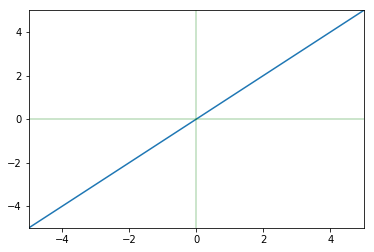

In [8]:
simple_linear_regression_manual_demo_1()

The green plot represents both the x and y-axes while the blue line is the $\hat{y}$ for each value of $x$. As you can see for yourself, if you decrease/increase $\beta_0$, the value where y cross $\hat{y}$ decreases/increases. If you increase/decrease $\beta_1$, the slope of the line increases/decreases.

Now, let's try to manually change $\beta_0$ and $\beta_1$ in order to fit a small dataset. In order to make your job easier, we added a metric (let's call it $J$) that goes down when you use better parameter combinations

$$J(y, \beta, x) = \frac{1}{N} \sum_{n=1}^N (y_n - \hat{y}_n)^2 = \frac{1}{N} \sum_{n=1}^N (y_n - (\beta_0 + \beta_1 \cdot x_n))^2$$

where $y_n$ is the target $n$ in your dataset. To implement this cost function, we can have:

In [9]:
linear_regression_cost = lambda y, y_hat: ((y - y_hat)**2).mean()

Now, the demo:

In [10]:
from utils import simple_linear_regression_demo_2

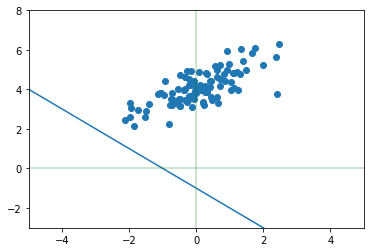

'Mean Squared Error (MSE): 29.491626006946202'

In [11]:
simple_linear_regression_demo_2()

Ok, doing this manually sucks. So, humans developed optimization algorithms to allow machines to adjust $\beta_0$ and $\beta_1$ according to some dataset. There are, at least, 3 categories of optimization procedures to do it:

1. Iterative methods using gradients;
2. Closed form solution through normal equations;
3. Evolutionary methods like genetic algorithms or particle swarm; 
4. Bayesian optimization.

Methods based on 3 and 4 are kind of an overkill at this point in time. We will explore methods based on gradient descent because they provide a, somehow, universal approach to optimization tasks and are really simple to grasp.

## Gradient Descent

Gradient descent is a well known and studied method for iterative optimization of both linear and non-linear models. You can use it to estimate the parameters for linear regression, neural networks, probabilistic graphical models, k-means and many more!

The essential component of the gradient descent algorithm is the **update rule**. Let $f$ be a differentiable function and $\omega$ one of parameters of $f$. Then, in order to minimize the value outputted by $f(\omega)$, we will use, iteratively, the following

$$\omega = \omega - \alpha \frac{\partial f(\omega)}{\partial \omega}$$

where $\frac{\partial f}{\partial \omega}$ is the [partial derivative of $f$ with respect to $\omega$](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives) and $\alpha$ is the learning rate. So, what gradient descent does is using the partial derivative as a _heuristic_ to the direction where the minimum is located and the multiplication between the learning rate and the partial derivative gives you a _velocity_ factor that you will use in order to update $\omega$. There are two ways to increase the _velocity_: (1) higher learning rates, (2) big gradients. 

In the following demo, you will control the learning rate of gradient descent for the minimization of $f(x) = x^2$.

In [12]:
from utils import gradient_descent_learning_rate_impact_demo

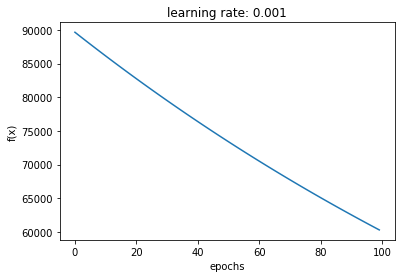

In [13]:
gradient_descent_learning_rate_impact_demo()

What is happening in the demo above is the following:

In [14]:
# Define the function to be minimized.
f = lambda x: x ** 2

# Define the partial derivative of the 
# function with respect to the feature.
df_dx = lambda x: 2 * x

# Define the learning rate.
learning_rate = 0.4

# The initial value for x.
x = -300

# The number of iterations to use.
epochs = 10

# Gradient Descent
for epoch in range(epochs): 
    # Compute the derivative of f.
    deriv = df_dx(x)
    
    # Update x.
    x = x - learning_rate * deriv
    
    print((x, f(x), deriv))

(-60.0, 3600.0, -600)
(-12.0, 144.0, -120.0)
(-2.3999999999999986, 5.759999999999994, -24.0)
(-0.47999999999999954, 0.23039999999999955, -4.799999999999997)
(-0.09599999999999986, 0.009215999999999974, -0.9599999999999991)
(-0.019199999999999967, 0.00036863999999999875, -0.19199999999999973)
(-0.0038399999999999927, 1.4745599999999944e-05, -0.038399999999999934)
(-0.0007679999999999983, 5.898239999999973e-07, -0.0076799999999999854)
(-0.00015359999999999961, 2.3592959999999883e-08, -0.0015359999999999966)
(-3.071999999999992e-05, 9.437183999999953e-10, -0.00030719999999999923)


If you increase the learning rate, it will converge faster to 0. But if you keep increasing to above 0.75-0.80, you will start to see a slower convergence or, even worst, overshooting (i.e. the value of $x$ gets to $-\infty$ or $+\infty$).

The previous function was quite simple to minimize. That is because it is a [convex function](https://en.wikipedia.org/wiki/Convex_function), meaning that, as long as you keep the learning rate with a reasonable value, you will converge to the minimum, sooner or later. But what happens when we use a function like 

$$f(x) = x^2 + \left|15 x\right| * cos(x)$$


it will be minimized with


$$x_{i+1} = 
x_{i} - \alpha \frac{\partial f}{\partial x_{i}} = 
x_{i} - \alpha \cdot (2 x_i + cos(x_i) \cdot \frac{15 x_i}{\left| x_i \right|} - \left|15 x_i\right| \cdot sin(x_i))$$


After looking at the previous formula, you might be thinking...

![sad_hamster](https://media.giphy.com/media/8UHwuM947LUjyyYh1o/giphy.gif "I thought this was a bootcamp")

**I KNOW, YOU WERE ALL TRICKED!!! MUAHAHAHAHAH**

Relax, that function is being used in order to show you some of the issues with gradient descent. Yes, I know it looks like an awfully complicated formula but bear with me. You will see why we used it in just a moment.

In [15]:
from utils import non_convex_gradient_descent_demo

non_convex_gradient_descent_demo()

interactive(children=(FloatSlider(value=0.01, description='learning_rate', max=2.0, min=0.01, step=0.01), Butt…

with this **non-convex** function, gradient descent might be unable to converge to one of the **global minima** and is stuck into one of the **local minima**. Of course, you could play with the learning rate back and forth until you manage to get to one of those global optima. But the machine hasn't the same capabilities as you (yet). All this to explain a simple fact: **there is no guarantees about reaching the global minima**. Fortunately, linear regression uses a convex cost function. :)

Now, let's get back to simple linear regression. When applying gradient descent to a model, we need to use the data points of a dataset to adjust the parameters of the model in order to minimize a **cost function**. We already know what the cost function (see the $J$ function). In order to do that, there are two main flavors of gradient descent: (1) stochastic gradient descent and (2) batch gradient descent. 

#### **Stochastic Gradient Descent (SGD)**

In SGD, we update the function parameters for each dataset observation we have. The generic pseudo-code for SGD is the following:

1. _For epoch in 1...epochs:_
    1. _$X'$ = shuffle($X$)_
    2. _For each $x_n$ in $X'$_:
        1. $\omega = \omega - \alpha \frac{\partial f(x_n, \omega)}{\partial \omega}$
        
where $\omega$ is the set of parameters of your function $f$, $X$ is your dataset (input and targets included) and _shuffle_ is a function that returns a shuffled version of $X$.

Let's transform the generic version into the simple linear regression optimization procedure by changing the partial derivatives definition. In order to do that, we need to get the partial derivatives of $J$

$$
\frac{\partial J}{\partial b_0} = 
\sum_{n=1}^N \frac{\partial J}{\partial \hat{y}_n} \frac{\partial \hat{y}_n}{\partial b_0} = 
-\frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$
\frac{\partial J}{\partial b_1} = 
\sum_{n=1}^N \frac{\partial J}{\partial \hat{y}_n} \frac{\partial \hat{y}_n}{\partial b_1} = 
-\frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) x_n $$

Now, let's adapt the pseudo code

1. _For epoch in 1...epochs:_
    1. _$X'$ = shuffle($X$)_
    2. _For each $x_n$ in $X'$_:
        1. $\hat{y} = \beta_0 + \beta_1 x_n$
        2. $b_0 = b_0 - \alpha \frac{\partial J}{\partial b_0} = b_0 + 2 \alpha (y_n - \hat{y}_n)$
        3. $b_1 = b_1 - \alpha \frac{\partial J}{\partial b_1} = b_1 + 2 \alpha (y_n - \hat{y}_n)x_n$
        

In [16]:
from sklearn.utils import check_random_state
from sklearn.utils import shuffle


def sgd_for_simple_linear_regression(x, y, b0, b1, learning_rate, epochs, random_state):
    # Getting the numpy arrays of both x and y 
    # in order to make the calculations simple.
    x = x.values
    y = y.values
    
    # Initialize our random numbers generator 
    # with check_random_state.
    random_state = check_random_state(random_state)
    
    for epoch in range(epochs): 
        # Shuffle our dataset.
        x_, y_ = shuffle(x, y, random_state=random_state)
        
        for n in range(x.shape[0]): 
            # Extract a single x and y.
            x__ = x_[[n]]
            y__ = y_[[n]]
            
            # Compute the predictions.
            y_hat = linear_regression(x__, b0, b1)
            
            # Compute the partial derivatives.
            dJ_db0 = -2 * (y__ - y_hat)
            dJ_db1 = -2 * (y__ - y_hat) * x__
            
            # Update the intercept and coefficient.
            b0 = b0 - learning_rate * dJ_db0
            b1 = b1 - learning_rate * dJ_db1
            
    return b0[0], b1[0]

[OFFTOPIC] You might be asking: *"What the hell are random_state and check_random_state?"*. For now, let's just say that *random_state* is the seed for a random numbers generator and *check_random_state* is a method that checks that seed and returns a random numbers generator.

[BACK ON TOPIC] Now, back To make it clear how this works, let's use the following demo.

In [17]:
from utils import sgd_simple_lr_dataset_demo

sgd_simple_lr_dataset_demo()

interactive(children=(FloatSlider(value=0.01, description='learning_rate', max=2.0, min=0.01, step=0.01), Floa…

On the left side, you have the usual plot for simple linear regression. On the right, you have $\beta_0$ and $\beta_1$ plotted into a 2D plane, in order for you to see how the behavior changes when you increase or decrease the learning rate. 

**Pros**
* For big datasets, if your model doesn't have _many_ parameters, the computational costs, both time and memory, will be very low.
* It is able to escape from "shallow" local minima due to the randomness of the procedure and to a higher irregularity of the path token within the parameter space.

**Cons**
* If you have a smooth error curve/surface and not a big dataset, no need to go with this.
* For smooth error curve/surfaces, if the dataset is not big, it can take more iterations to converge to the minimum than batch gradient descent would take.
* You **really** need to keep an eye on the learning rate. Having a bigger learning rate can take you out of local minima but it can also cause overshooting.

#### **Batch Gradient Descent (BGD)**

Unlike SGD, BGD aggregates the partial derivatives from **all observations in the dataset** before using the update rule

1. _For epoch in 1...epochs:_
    2. $\omega = \omega + \alpha \sum_{n=1}^N \frac{\partial f(x_n, \omega)}{\partial \omega}$
    
The main advantage of this approach is that you get a smoother path to the minimum, with less variance in the path to the minimum. Translating the generic formula to the context of simple linear regression:


1. _For epoch in 1...epochs:_
    1. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0} = \beta_0 + \alpha \frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n)$ 
    2. $\beta_1 = \beta_1 - \alpha \frac{\partial J}{\partial \beta_1} = \beta_1 + \alpha \frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n) x_n$

In [18]:
def bgd_for_simple_linear_regression(x, y, b0, b1, learning_rate, epochs):
    # For an arbitrary number of epochs
    for epoch in range(epochs): 
        # Compute predictions.
        y_hat = linear_regression(x, b0, b1)
        
        # Compute the partial derivatives of J.
        dJ_db0 = -(2 * (y - y_hat)).mean()
        dJ_db1 = -(2 * (y - y_hat) * x).mean()
        
        # Update the intercept and coefficient.
        b0 = b0 - learning_rate * dJ_db0
        b1 = b1 - learning_rate * dJ_db1
    
    return b0, b1

Also, we have a demo for BGD:

In [19]:
from utils import bgd_simple_lr_dataset_demo

bgd_simple_lr_dataset_demo()

interactive(children=(FloatSlider(value=0.01, description='learning_rate', min=0.01, step=0.01), FloatSlider(v…

**PROS**
* It is less sensitive to the learning rate than SGD. For that reason, you can use a bigger learning rate in order to get faster to the minimum.
* For smooth error curves/surfaces and datasets not so big, you can get updates on your parameters without having to take a break for lunch, for a snack, for Netflix, for dinner...

**Cons**
* It is **really expensive** for big datasets to get an update on your parameters because you need to go through **all the dataset** in order to perform an update.

You might be wondering: *"Can't we have some middle ground between SGD and BGD?"*. Well, the answer is: **YES!!**. But that is an advanced topic! Once you manage to grasp the idea of gradient descent, SGD, and BGD, you are free to go explore more advanced methods like the Mini-Batch (Stochastic) Gradient Descent.

## Multiple Linear Regression

Most phenomena in our world is dependent on several factors. For example, house prices depend on things like (1) number of rooms, (2) distance to malls, (3) distance to parks, (4) how old the house is, etc. As such, it would be naive, at best, to create a univariate linear model to predict the house prices. So, let's expand our simple linear regression into *multiple* linear regression

$$\hat{y} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3 + \beta_4 \cdot x_4 + \beta_5 \cdot x_5 = \hat{y} = \beta_0 + \sum_{i=1}^{5} \beta_i \cdot x_i$$

In [20]:
multiple_linear_regression = lambda x, betas: betas[0] + x.dot(betas[1:])

Pretty simple, hein? The more features you have, the more you include in the sum! But there is a **very important assumption** that this model does: there is no multicollinearity in your data. _"What the hell does that even mean?"_, you might ask. This term comes from linear algebra and this is what it means: 

_If you have a feature $x_i$ which the values can be obtained through a **linear combination** of other features, then we have multicollinearity._

Let me give you some of the reasons this is a problem: 
1. When people use linear regressions, after the parameter estimation phase, they use the coefficients as a way to measure **how important a feature**. When you use collinear features, the magnitude of the weights gets 's lowered for all features that are in that collinear relationship. That might be misleading because collinear features are, essentially, one feature.
2. Collinear features add no value to the model, it is like cloning the same feature and concatenating it to the dataset. 

We will experiment with a dataset with collinear features later on this learning unit.

Also, you should always normalize your dataset into a unified scale (e.g. range [0; 1]). The reasons why:
1. Depending on what optimization algorithm you use, if feature $f_1$ has a domain of [-4.1; 3] and feature $f_2$ has a domain of [-1.1; 100000], the impact in the gradient can lead to problems in the convergence to the global minima (i.e. you probably won't get accurate results for your predictions). There are optimization algorithms that can avoid this issue but still suffer from the issue (2).
2. If two features are using different ranges, it will be hard to compare features in terms of feature importance. If a feature ($f_1$) has a domain of [-0.1; 0.1] and another ($f_2$) has domain of [0; 1000], it doesn't make sense to look at the influence in the prediction through the same lens as the ones we use in the introduction to simple linear regression (i.e. an increase of 1 unit in $x$ increases $\beta_1$ units in $\hat{y}$). Due to the fact that feature $f_1$ never goes to -1 or +1, that interpretation wouldn't make sense and, as such, we would have two options:
    1. normalize the resulting coefficients accordingly to the scale;
    2. or normalize the inputs into the same scale.

We will use gradient descent to optimize the intercept and coefficients. First, let's extract the partial derivatives of the cost function.

$$
\frac{\partial J}{\partial b_0} = 
\sum_{n=1}^N \frac{\partial J}{\partial \hat{y}_n} \frac{\partial \hat{y}_n}{\partial b_0} = 
-\frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) $$

$$
\frac{\partial J}{\partial b_1} = 
\sum_{n=1}^N \frac{\partial J}{\partial \hat{y}_n} \frac{\partial \hat{y}_n}{\partial b_1} = 
-\frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) x_{1_n} $$

$$...$$

$$
\frac{\partial J}{\partial b_k} = 
\sum_{n=1}^N \frac{\partial J}{\partial \hat{y}_n} \frac{\partial \hat{y}_n}{\partial b_k} = 
-\frac{1}{N} \sum_{n=1}^N 2(y_n - \hat{y}_n) x_{k_n} $$



where $x_{1_n}$ is the value of feature 1 for the instance $n$ of the dataset and $x_{k_n}$ is the value of feature $k$ for the instance $n$ of the dataset.

The pseudo code for SGD is

1. _For epoch in 1...epochs:_
    1. _X' = shuffle(X)_
    2. _For each $x_n$ in $X'$_:
        1. $\hat{y} = \beta_0 + \beta_1 x_n$
        2. $b_0 = b_0 - \alpha \frac{\partial J}{\partial b_0} = b_0 + 2 \alpha (y_n - \hat{y}_n)$
        3. *For k in 1...num_features:*
            1. $b_k = b_k - \alpha \frac{\partial J}{\partial b_k} = b_k + 2 \alpha (y_n - \hat{y}_n)x_{k_n}$

In [21]:
def sgd_multiple_linear_regression(x, y, betas, learning_rate, epochs, random_state):
    # Initialize our random numbers generator 
    # with check_random_state.
    random_state = check_random_state(random_state)

    # Getting the numpy arrays of both x and y 
    # in order to make the calculations simple.
    x = x.values
    y = y.values

    for epoch in range(epochs): 
        # Shuffle our dataset.
        x_, y_ = shuffle(x, y, random_state=random_state)

        for n in range(x.shape[0]): 
            # Extract a single x and y.
            x__ = x_[[n]]
            y__ = y_[[n]]

            # Compute the predictions.
            y_hat = multiple_linear_regression(x__, betas)

            # Compute the partial derivatives.
            dJ_db0 = -2 * (y__ - y_hat)
            dJ_dbk = -2 * (y__ - y_hat) * x__.T

            # Update the intercept and coefficient.
            betas[0] = betas[0] - learning_rate * dJ_db0
            betas[1:] = betas[1:] - learning_rate * dJ_dbk
            
    return betas

For BGD, we have

1. _For epoch in 1...epochs:_
    1. $\beta_0 = \beta_0 - \alpha \frac{\partial J}{\partial \beta_0} = \beta_0 + \alpha \frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n)$ 
    2. _For i in 1..K:_
        1. $\beta_i = \beta_i - \alpha \frac{\partial J}{\partial \beta_i} = \beta_i + \alpha \frac{1}{N} \sum_{n=1}^N 2 (y_n - \hat{y}_n) x_n$

In [22]:
def bgd_multiple_linear_regression(x, y, betas, learning_rate, epochs):
    for epoch in range(epochs): 
        y_hat = multiple_linear_regression(x, betas)

        dJ_dbetas = np.zeros((x.shape[1] + 1, 1))

        dJ_dbetas[0] = -(2 * (y - y_hat)).mean()

        for k, col in enumerate(x.columns): 
            dJ_dbetas[k+1] = -((2 * (y - y_hat)) * x[col]).mean()
    
    return dJ_dbetas

## Linear Regression Pros & Cons

**PROS**
* Really easy to understand
* Fast optimization
* Easy to extend the model: you haven't seen how this is true but there is a thing called _Generalized Linear Model (GLM)_. Once you get a good grip on linear regression, you should visit the [scikit learn page on GLMs](http://scikit-learn.org/stable/modules/linear_model.html).

**CONS**
* Sensible to outliers, even though there are extensions that are able to deal (partially) with this issue.
* Assumes that there is no multicollinearity.
* Feature scaling is required.
* Monotonicity assumption: for the model, the relation between each feature and the output. 
* Categorical encoding: this might get tricky when the number of uniques is big and part of those uniques have few occurrences.


#### Notes

At this point, if you already knew linear regression in detail before the academy, you might be wondering: *"Where is the error component in the linear regression formula?"*. The reason is quite simple: since we wanted you to approach this subject from a more practical standpoint than theoretical.

Also, we didn't include all assumptions made by the linear regression model. For a hands-on approach to the assumptions, check this [blog post by Selva Prabhakaran](http://r-statistics.co/Assumptions-of-Linear-Regression.html).

## Using Scikit Learn to perform regression

After learning the basics of linear regression and how to estimate, iteratively, the best parameters for the model, it is time to learn how to use linear regression with Scikit Learn. 

[Scikit Learn][sklearn] is an industry standard for data science and machine learning and we will be using it extensively throughout the academy. Scikit Learn has two implementations of linear regression:
* [*sklearn.linear_model.SGDRegressor*][SGDRegressor]: uses stochastic gradient descent to estimate the intercept and coefficients. Also, this class allows more advanced forms of linear regression that is out of scope for the moment.
* [*sklearn.linear_model.LinearRegression*][LinearRegression]: uses normal equations to estimate the best intercept and coefficients. Normal equations are the closed form solution for linear regression, meaning that you know exactly the number of steps and the guarantees about the solution. If you want to know more about this, [read this blog post][normal_eq].

[SGDRegressor]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
[LinearRegression]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
[sklearn]: http://scikit-learn.org
[normal_eq]: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

First, let's load the [Boston housing price dataset][boston_kaggle]

[boston_kaggle]: https://www.kaggle.com/c/boston-housing

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
print(data['DESCR'])

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='medv')

pd.concat((X, y), axis=1).head(5)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's experiment with the first linear regression implementation:

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(X.head(5)))
print('\nTotal Score\n', lr.score(X, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]

Total Score
 0.7406077428649427


We got an R² score of ~74, which might be adequate for the first try. R² is one of the most well-known metrics to evaluate regression models.We will dive into it in SLU12.

Modeling is not only about getting the best accurate model ever. If you get a big R² score for the wrong reasons (e.g. target leaks, too many useless variables), that model is kind of...useless. As such, let's look into how each feature contributes to the prediction

In [25]:
a = pd.Series(lr.coef_, index=X.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

NOX       -17.795759
RM          3.804752
CHAS        2.688561
DIS        -1.475759
PTRATIO    -0.953464
LSTAT      -0.525467
RAD         0.305655
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
TAX        -0.012329
B           0.009393
AGE         0.000751
Name: Features Coefficients (sorted by magnitude), dtype: float64

_NOX_, according to the dataset documentation, refers to _"nitric oxides concentration (parts per 10 million)"_. The coefficient for _NOX_ is WAAAAAY BIGGER than the ones in the other features. Does it mean that (1) air pollution is a BIIIG problem in Boston, (2) people that buy houses in Boston REALLY REALLY REALLY HATE pollution

![pollution_level_chinese](http://weknowmemes.com/generator/uploads/generated/g136362126738785004.jpg)

or does it mean that something was wrong in our approach? 

First of all, let's check some statistics about our features:

In [26]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


it seems that there the scales for different features are *way* different from one another. For example, the domain of _CRIM_ is [0.006320; 88.976200] while _TAX_ is in [187; 711]. This means that, in the context of linear regression, the **coefficients are not comparable**. Fortunately, we have a preprocessed version of this dataset with all features in the same scale. Let's use it:

In [27]:
import pandas as pd

In [28]:
data = pd.read_csv('data/boston (scaled).csv')

X_ = data.drop(['MEDV'], axis=1)
y = data['MEDV']

lr = LinearRegression()

lr.fit(X_, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(X_.head(5)))
print('\nTotal Score\n', lr.score(X_, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]

Total Score
 0.7406077428649427


In [29]:
a = pd.Series(lr.coef_, index=X_.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

LSTAT     -3.748680
DIS       -3.104448
RM         2.670641
RAD        2.658787
TAX       -2.075898
PTRATIO   -2.062156
NOX       -2.060092
ZN         1.080981
CRIM      -0.920411
B          0.856640
CHAS       0.682203
INDUS      0.142967
AGE        0.021121
Name: Features Coefficients (sorted by magnitude), dtype: float64

Also, we can normalize the coefficients in order to see the relative weight of each feature

In [30]:
a.abs() / a.abs().sum()

LSTAT      0.169739
DIS        0.140568
RM         0.120925
RAD        0.120389
TAX        0.093996
PTRATIO    0.093373
NOX        0.093280
ZN         0.048946
CRIM       0.041676
B          0.038788
CHAS       0.030890
INDUS      0.006473
AGE        0.000956
Name: Features Coefficients (sorted by magnitude), dtype: float64

It seems that over 50% of the relative feature strength is concentrated in: 
* _LSTAT_ (decreases price): % lower status of the population
* _DIS_ (decreases price): weighted distances to five Boston employment centers
* *RM* (increases price): average number of rooms per dwelling
* _RAD_ (increases price): index of accessibility to radial highways

Now, time to use SGDRegressor. As previously stated, this class allows fine tuning regarding learning rate, weights constraints, extensions of gradient descent, etc. We will use the configuration that allows the most similar behavior to the one described for stochastic gradient descent.

In [31]:
from sklearn.linear_model import SGDRegressor

learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

lr.fit(X, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(X.head(5)))
print('\nTotal Score\n', lr.score(X, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [-8.81456209e+13 -9.34010426e+13 -8.94837901e+13 -8.95555858e+13
 -9.13474538e+13]

Total Score
 -5.973466231191271e+25


WTF?! We got prediction overshooting and an AWFUL R² score! Is this related to feature scaling? Let's check if that is the case.

In [32]:
learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

lr.fit(X_, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(X_.head(5)))
print('\nTotal Score\n', lr.score(X_, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [29.69419554 24.75456216 30.16659133 28.09211046 27.46078478]

Total Score
 0.7380980597701932


I guess we have our answer. Unlike _LinearRegression_, **having the same scale is not an option** for _SGDRegressor_.

In [33]:
a = pd.Series(lr.coef_, index=X_.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

LSTAT     -3.680366
DIS       -3.181424
RM         2.634311
RAD        2.633794
PTRATIO   -2.035668
NOX       -1.982095
TAX       -1.931509
ZN         1.031784
CRIM      -0.891170
B          0.809772
CHAS       0.694754
INDUS      0.168438
AGE        0.087407
Name: Features Coefficients (sorted by magnitude), dtype: float64

Finally, let's explore the effect of **multicollinearity**. First, let's create a dataset:

In [34]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=4, n_informative=4, 
                       n_targets=1, random_state=10, noise=20)
x = pd.DataFrame(X)
y = pd.Series(y)

Now, let's make a copy of $X$ and include multicollinearity in the new copy:

In [35]:
X_ = X.copy()

X_[4] = 0.3 * X_[0] + 0.3 * X_[1] + 0.4 * X_[2]

Now, let's fit a linear regression with the original dataset:

In [36]:
lr = LinearRegression()
lr.fit(X, y)
print('R² score: ', lr.score(X, y))
print('Coefficients: ', lr.coef_)

R² score:  0.973873466791004
Coefficients:  [95.89264211 20.7771769  67.332997   61.57570178]


And one with the copy of $X$:

In [37]:
lr = LinearRegression()
lr.fit(X_, y)
print('R² score: ', lr.score(X_, y))
print('Coefficients: ', lr.coef_)

R² score:  0.931420777936116
Coefficients:  [93.15355813 21.11015385 65.49562433 59.11102235]


**INTERESTING!!!** It seems that the magnitude of features *f0*, *f1* and *f2* was "transferred" to *f4*! But the R² score is the same! 

Do we get the same type of issue with SGDRegressor?

In [38]:
learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

lr.fit(X, y)
print('R² score: ', lr.score(X, y))
print('Coefficients: ', lr.coef_)

R² score:  0.9738714924029974
Coefficients:  [95.81397888 20.83793972 67.21773658 61.44690935]


In [39]:
learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

lr.fit(X_, y)
print('R² score: ', lr.score(X_, y))
print('Coefficients: ', lr.coef_)

R² score:  0.9314192859901802
Coefficients:  [93.09869394 21.1590517  65.39629399 58.99812664]


So, we got the same type of results, with the exception of the small R² score oscillation (due to stochastic process influence).

There are several steps we didn't include: 
* Exclude the feature _CHAS_ from the scaler. _CHAS_ is a dummy feature (i.e. the result of categorical feature encoding) and isn't a continuous feature per se.
* Perform correlation analysis in order to avoid including 2, or more, features that are highly correlated. When using highly correlated features in a linear model, you might be violating the assumption of no multicollinearity.
* We didn't remove outliers. This is a problem for models like linear regression due to sensitivity to outliers. Fortunately, there are implementations for robust linear regression within scikit learn ([RANSAC][RANSAC], [Theil-Sen][Theil-Sen] and [Huber][Huber]).
* We didn't perform correlation analysis between each input feature and the target. 

We didn't include those steps but, with all you have learned so far in the academy, you are able to perform those by yourself. :)


[RANSAC]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor
[Theil-Sen]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor
[Huber]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor